# Case Study on Probability for Data Science


Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is  edible or poisonous (e or p) using the given dataset.(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
##Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore") 

In [2]:
##Read the dataset to python environment
data=pd.read_csv('mushrooms.csv')
data.head()     ## Printing first five rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

Dataset has 23 features with 8124 observations

In [4]:
data.info()  ## summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The 23 features are of type object and the dataset is clean with no missing values

In [5]:
data.isna().sum()  ## Checking again for any missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.describe()   ## statistical summary

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


unique gives the number of catogorical values,top shows the highest occuring value

In [7]:
data.columns     ## Different characteristics of mushroom

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
## We have to build different machine learning models that will detect if the mushroom is edible or poisonous by its specifications

target=data['class'].value_counts()
target

e    4208
p    3916
Name: class, dtype: int64

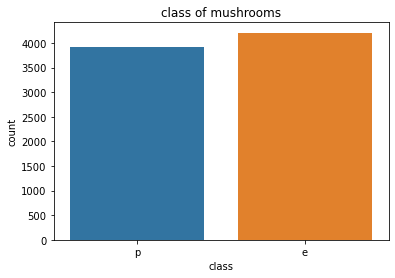

In [9]:
sns.countplot(data['class'])
plt.title('class of mushrooms')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

4208 edible and 3916 poisonous mushrooms

# LABEL ENCODER

To convert catogorical columns to ordinal label encoder is used. 

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [11]:
data.head()   ##LabelEncoder converts each value in a column to a number.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [12]:
data['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

The column veil-type is 0 and not contributing to the data so removing it

In [13]:
data=data.drop(['veil-type'],axis=1)

Checking for correlation

<AxesSubplot:>

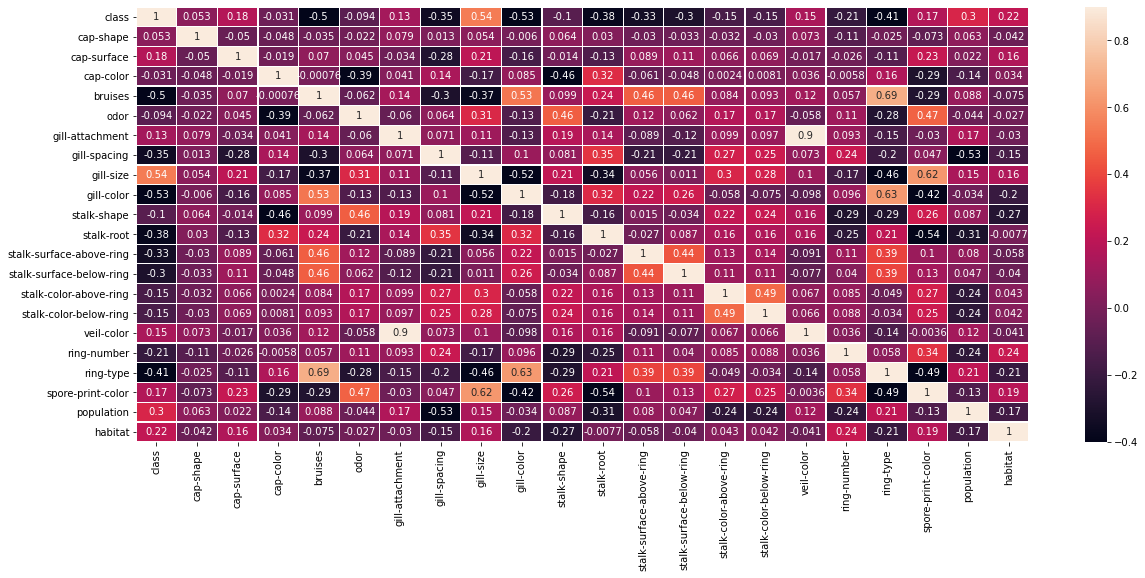

In [14]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2)

gill colour is showing least correlation

Splitting the data (Data preparation)


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop(['class'], axis=1)    ## Dropping class column
y = data['class']    ##Class is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# MODELLING

# Logistic Regression Classification

In [16]:
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [17]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_predlog = logit_model.predict(X_test)

In [18]:
print('Accuracy is  :',accuracy_score(y_test,y_predlog))

Accuracy is  : 0.947076923076923


In [19]:
## Classification Report
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_predlog))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [20]:
confusion_matrix(y_test, y_predlog)


array([[798,  45],
       [ 41, 741]], dtype=int64)

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [23]:
acc_values

[0.9981538461538462,
 0.9963076923076923,
 0.9963076923076923,
 0.9969230769230769,
 0.9956923076923077,
 0.9950769230769231,
 0.9950769230769231,
 0.9950769230769231,
 0.9956923076923077,
 0.9938461538461538,
 0.9944615384615385,
 0.9938461538461538,
 0.9938461538461538,
 0.9932307692307693,
 0.9938461538461538,
 0.9932307692307693,
 0.9932307692307693]

Text(0, 0.5, 'accuracy')

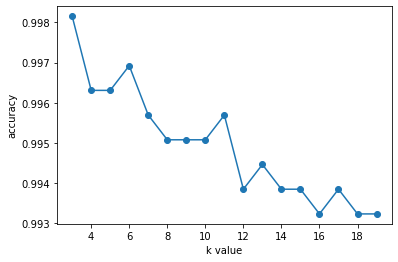

In [24]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [25]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train)
y_predknn=classifier.predict(X_test)

In [26]:
print("KNN Classifier report: \n\n", classification_report(y_test, y_predknn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [27]:
confusion_matrix(y_test, y_predknn)

array([[840,   3],
       [  0, 782]], dtype=int64)

In [28]:
print('Accuracy is  :',accuracy_score(y_test,y_predknn))

Accuracy is  : 0.9981538461538462


# SVM

In [29]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [30]:
y_predsvm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_predsvm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [31]:
confusion_matrix(y_test, y_predsvm)


array([[843,   0],
       [  0, 782]], dtype=int64)

# Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
y_predrf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_predrf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [34]:
confusion_matrix(y_test, y_predrf)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [35]:
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


# Naive Bayes Classification

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [37]:
y_prednb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_prednb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



In [38]:
confusion_matrix(y_test, y_prednb)

array([[771,  72],
       [ 55, 727]], dtype=int64)

In [39]:
print('Accuracy is  :',accuracy_score(y_test,y_prednb))

Accuracy is  : 0.9218461538461539


Accuracy ranges between 90% and 100% for all the classification methods.So the mushroom is edible